# Задание

## Цель
Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

## Описание задания
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/datasets/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

## Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
    а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
    а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции [sns.boxplot, sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Есть ли признаки с нормальным распределением?
    b) Исследуйте признаки на выбросы несколькими способами.
    c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
    а) Кратко опишите, какие преобразования были сделаны с данными.
    b) Сравните точность двух моделей.
    c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

## Результат
Получены практические знания по работе с выбросами в данных.

## Форма выполнения
- Ссылка на Jupyter Notebook, загруженный на GitHub;
- Ссылка на Google Colab;
- Файл с расширением .ipynb.

## Инструменты
- Jupyter Notebook/Google Colab;
- GitHub;
- [Сайт](https://www.kaggle.com/datasets/uciml/glass) с данными для обучения моделей;
- Модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

## Срок выполнения
Дедлайн приема решений на проверку.

## Рекомендации к выполнению
1. Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате Markdown.
2. Графикам должны быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
3. Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
4. Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

## Выполнение задания
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

## Подводя итоги
В данном задании вы исследуете данные на наличие выбросов и проведете EDA (исследование данных). После этого обработаете выбросы и обучите две модели для классификации типов стекол, сравнив их точность.

Успехов в выполнении задания!

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from scipy import stats

import warnings

warnings.filterwarnings('ignore')

# 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [4]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Проведите первичный анализ. а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [7]:
df['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

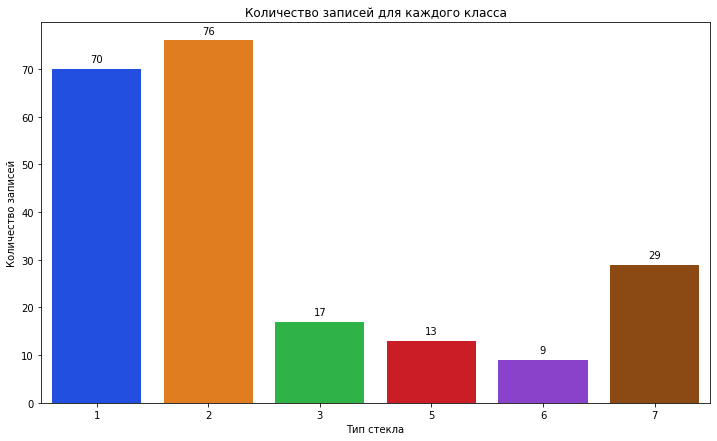

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame df с данными
# и у вас уже выполнен первичный анализ и разделение выборки на обучающее и тестовое подмножество

# Построение графика sns.countplot
plt.figure(figsize=(12, 7)) # Размер графика
ax = sns.countplot(data=df, x='Type', palette='bright')

# Добавление подписей значений над каждой категорией
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height}', ha='center', va='bottom')

# Настройка заголовка и подписей осей
plt.title('Количество записей для каждого класса')
plt.xlabel('Тип стекла')
plt.ylabel('Количество записей')

# Отображение графика
plt.show()


Вывод:
Распределение данных по типам стекла указывает на неравномерность в количестве записей для различных классов. Типы 1 и 2 представлены более обширно по сравнению с типами 3, 5, 6 и 7, количество записей которых существенно меньше.

# 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [12]:
# Разделение на признаки и целевую переменную
X = df.drop('Type', axis=1)
y = df['Type']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Обучающая выборка: {X_train.shape[0]} записей')
print(f'Тестовая выборка: {X_test.shape[0]} записей')

Обучающая выборка: 171 записей
Тестовая выборка: 43 записей


# 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Создание экземпляра классификатора
rf = RandomForestClassifier(random_state=42)

# Обучение классификатора
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [17]:
# Предсказание на тестовой выборке
y_pred = rf.predict(X_test)

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели: {accuracy}')

Точность модели: 0.8372093023255814


# Обработайте выбросы в данных.
- а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
- b) Исследуйте признаки на выбросы несколькими способами.
- c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

## а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

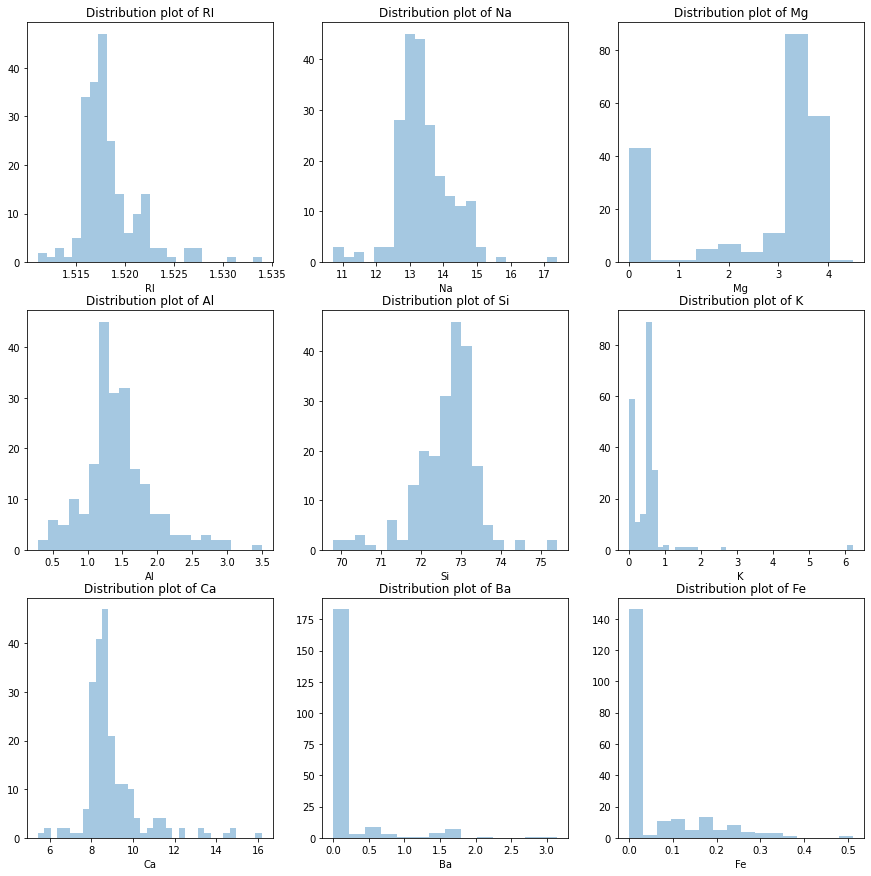

In [33]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Располагаем графики в сетке 3x3
for ax, column in zip(axs.flat, df.columns[:-1]):
    sns.distplot(df[column], kde=False, ax=ax)
    ax.set_title(f'Distribution plot of {column}')

plt.show()


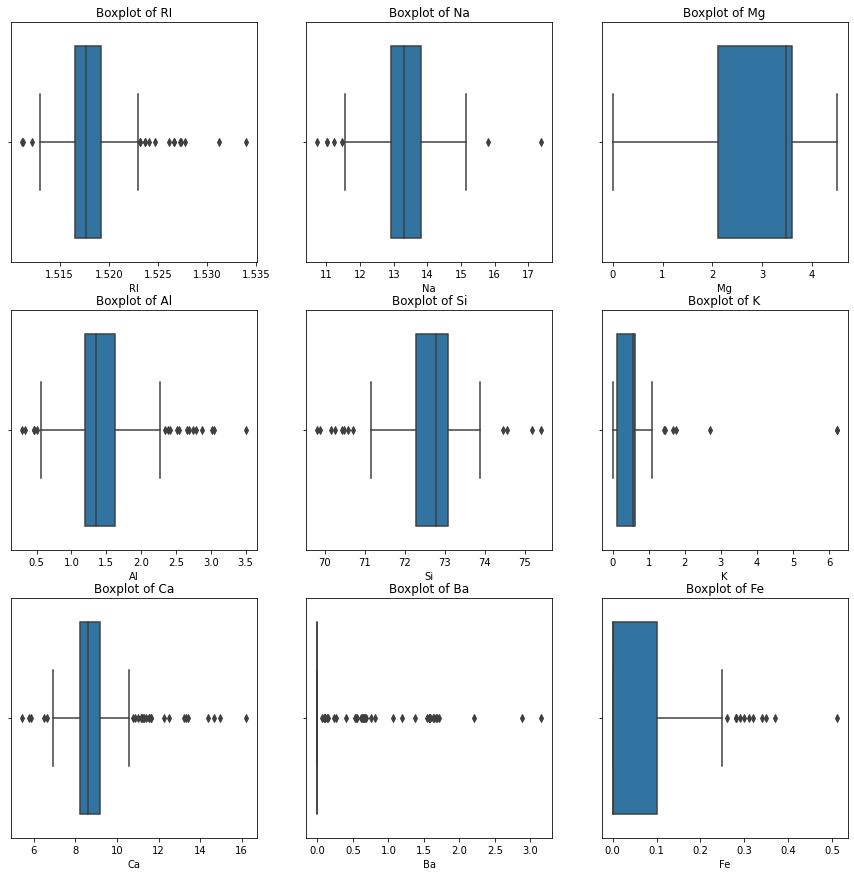

In [35]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Располагаем графики в сетке 3x3
for ax, column in zip(axs.flat, df.columns[:-1]):
    sns.boxplot(df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

## Для проверки на нормальное распределение применим статистический текст Шапиро-Уилка

In [36]:
from scipy.stats import shapiro

# Применяем тест Шапиро-Уилка ко всем столбцам (кроме последнего)
for column in df.columns[:-1]:
    stat, p_value = shapiro(df[column])
    if p_value > 0.05:
        print(f"{column} - гипотеза о нормальности не отвергается")
    else:
        print(f"{column} - гипотеза о нормальности отвергается")


RI - гипотеза о нормальности отвергается
Na - гипотеза о нормальности отвергается
Mg - гипотеза о нормальности отвергается
Al - гипотеза о нормальности отвергается
Si - гипотеза о нормальности отвергается
K - гипотеза о нормальности отвергается
Ca - гипотеза о нормальности отвергается
Ba - гипотеза о нормальности отвергается
Fe - гипотеза о нормальности отвергается


Вывод: формально ни один признак не прошел проверку на нормальное распределение на уровне значимости 5%, но исходя из графиков видно, что распределение NA, AI, SI, RI и CA напоминает нормальное распределение.

## b) Исследуйте признаки на выбросы несколькими способами.
## c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [46]:
# Я буду использовать 3 подхода для определения выбросов:

# 1. IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# 2. Z_score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    df_out = df[(z_scores < threshold).all(axis=1)]
    return df_out

# Isolation Forest
def remove_outliers_isolation_forest(df):
    model = IsolationForest(contamination=0.1)
    model.fit(df)
    df['anomaly'] = model.predict(df)
    df_out = df[df['anomaly'] != -1]
    df_out.drop('anomaly', axis=1, inplace=True)
    return df_out

In [47]:
df_iqr = remove_outliers_iqr(df)
df_zscore = remove_outliers_zscore(df)
df_isolation_forest = remove_outliers_isolation_forest(df)

In [49]:
# процент удаленных записей для каждого метода
removed_percent_iqr = (len(df) - len(df_iqr)) / len(df) * 100
removed_percent_zscore = (len(df) - len(df_zscore)) / len(df) * 100
removed_percent_isolation_forest = (len(df) - len(df_isolation_forest)) / len(df) * 100

print("IQR method: {:.2f}% records removed.".format(removed_percent_iqr))
print("Z-score method: {:.2f}% records removed.".format(removed_percent_zscore))
print("Isolation Forest method: {:.2f}% records removed.".format(removed_percent_isolation_forest))


IQR method: 36.45% records removed.
Z-score method: 9.35% records removed.
Isolation Forest method: 10.28% records removed.


In [ ]:
Удалю выбросы на основе бокс плота

# 7. Повторите п. 4, п. 5.

In [50]:
import pandas as pd

# Создание пустого датафрейма
accuracy_df = pd.DataFrame(columns=['Method', 'Accuracy'])

# Обработка первоначального датафрейма без удаления выбросов
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_df = accuracy_df.append({'Method': 'No Outliers', 'Accuracy': accuracy}, ignore_index=True)

# Повторение для каждого метода удаления
for df_outliers_removed, method_name in zip([df_iqr, df_zscore, df_isolation_forest], ['IQR', 'Z-score', 'Isolation Forest']):
    X = df_outliers_removed.drop('Type', axis=1)
    y = df_outliers_removed['Type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_df = accuracy_df.append({'Method': method_name, 'Accuracy': accuracy}, ignore_index=True)

# Вывод датафрейма с результатами точности
print(accuracy_df)


             Method  Accuracy
0       No Outliers  0.860465
1               IQR      0.75
2           Z-score  0.846154
3  Isolation Forest  0.717949


In [53]:
accuracy_df.sort_values('Accuracy', ascending=False)

,Method,Accuracy
0,No Outliers,0.860465
2,Z-score,0.846154
1,IQR,0.75
3,Isolation Forest,0.717949


# 8. Сформулируйте выводы по проделанной работе. а) Кратко опишите, какие преобразования были сделаны с данными. b) Сравните точность двух моделей. c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

## a) Преобразования данных:

Было проведено удаление выбросов с использованием трех методов: IQR, Z-score и Isolation Forest.

## b) Сравнение точности моделей:

Наибольшая точность была достигнута на исходном датасете без удаления выбросов (No Outliers) и составила 0.860465.
Точность моделей на обработанных датасетах с удаленными выбросами была ниже:

- Для метода Z-score точность составила 0.846154.
- Для метода IQR точность составила 0.75.
- Для метода Isolation Forest точность составила 0.717949.

Понижение точности модели после удаления выбросов может быть связано с недостатком данных для обучения и валидации. Исходный датафрейм содержал всего 214 записей.

### c) Мнение о необходимости исследования данных на выбросы:

Исследование данных на выбросы является важным этапом в предобработке данных. Поиск и удаление выбросов может быть полезным, когда выбросы представляют собой ошибочные или аномальные значения, которые могут исказить анализ или обучение моделей.

Плюсы подхода в обнаружении и удалении выбросов включают повышение качества данных, улучшение производительности моделей и улучшение интерпретируемости результатов.

Важно! Однако, в данном случае с небольшим количеством данных (214 записей), удаление выбросов может привести к потере информации и снижению качества модели.


